# Hotel Booking Cancallation Prediction

**Load Data**

Load Hotel_Booking/hotel_bookings.csv file provided on Brightspace.

In [260]:
import pandas as pd

# importing the dataframe:

In [261]:
#importing the data
fulldata = pd.read_csv('./hotel_bookings.csv')
fulldata.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [262]:
##getting table information

fulldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# 1. Data Pre-processing (25%)


---






**Drop irrelevant columns**

It will significantly reduce the time and effort you need to invest. As a general guideline, columns containing IDs, dates, or irrelevant information are typically considered redundant and offer little value for predictive analysis.

# dropping irrelevent columns:

In [263]:
#due to the data being collected over a long period of time (3 years), some of the data is irrelevent. dropping irrelevant columns:

fulldata.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month','country', 'agent', 'company', 'reservation_status', 'reservation_status_date'], inplace=True)
fulldata


,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,Direct,...,0,C,C,3,No Deposit,0,Transient,0.00,0,0
1,Resort Hotel,0,737,0,0,2,0.0,0,BB,Direct,...,0,C,C,4,No Deposit,0,Transient,0.00,0,0
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,Direct,...,0,A,C,0,No Deposit,0,Transient,75.00,0,0
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,Corporate,...,0,A,A,0,No Deposit,0,Transient,75.00,0,0
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,Online TA,...,0,A,A,0,No Deposit,0,Transient,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2,5,2,0.0,0,BB,Offline TA/TO,...,0,A,A,0,No Deposit,0,Transient,96.14,0,0
119386,City Hotel,0,102,2,5,3,0.0,0,BB,Online TA,...,0,E,E,0,No Deposit,0,Transient,225.43,0,2
119387,City Hotel,0,34,2,5,2,0.0,0,BB,Online TA,...,0,D,D,0,No Deposit,0,Transient,157.71,0,4
119388,City Hotel,0,109,2,5,2,0.0,0,BB,Online TA,...,0,A,A,0,No Deposit,0,Transient,104.40,0,0


## 1.1 Missing Values (10%)

Identify and handle missing values.

## identifying missing information:

In [264]:
# the difference between the isna and the isnull is:

#isna() is used to detect the missing values 
# in the cells of the pandas data frame. It returns a data frame of the same size with the values masked as True for NA values and False for non-NA values.
#  isnull() is also used to identify or detect the missing values in the data frame. It is just an alias for isna() method.

fulldata.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

## Unique values

Find out unique values in columns. This will help you in identifying in-consistent data.

In [265]:
#inconsistant data can be tricy to work with and can affect the accuracy of the model.

fulldata.hotel.value_counts()

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

In [266]:
fulldata.is_canceled.value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [267]:
fulldata.children.value_counts()

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

In [268]:
# you can also quicken up the process by displaying the unique vales of multiple columns at once, this is good as it groups the information and is less time consuming.
# however this makes the data displayed harder to understand and harder to identify the unique values in each column

fulldata[['meal','market_segment', 'distribution_channel' ]].value_counts()

meal       market_segment  distribution_channel
BB         Online TA       TA/TO                   42020
           Offline TA/TO   TA/TO                   17510
           Groups          TA/TO                   13562
           Direct          Direct                  10572
SC         Online TA       TA/TO                    9786
                                                   ...  
HB         Direct          Undefined                   1
BB         Online TA       Undefined                   1
Undefined  Direct          TA/TO                       1
FB         Direct          TA/TO                       1
           Offline TA/TO   Direct                      1
Name: count, Length: 80, dtype: int64

In [269]:
fulldata.reserved_room_type .value_counts()

reserved_room_type
A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: count, dtype: int64

In [270]:
fulldata.assigned_room_type.value_counts()

assigned_room_type
A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: count, dtype: int64

In [271]:
fulldata.deposit_type.value_counts()

deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: count, dtype: int64

In [272]:
fulldata.customer_type.value_counts()

customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64

## 1.2 Removing Inconsistent values and Outliers (10%)

Detecting inconsistencies can be achieved through a variety of methods. Some can be identified by examining unique values within each column, while others may require a solid understanding of the problem domain. Since you might not be an expert in the hotel or hospitality industry, here are some helpful hints:

Hints:

1. Check for incomplete bookings, such as reservations with zero adults, babies, or children.
2. Examine rows with zeros in both 'stays_in_weekend_nights' and 'stays_in_week_nights.'



# checking for incomplete bookings:

In [273]:
fulldata[(fulldata['adults']==0) & (fulldata['children']==0) & (fulldata['babies']==0)].index

Index([  2224,   2409,   3181,   3684,   3708,   4127,   9376,  31765,  32029,
        32827,
       ...
       112558, 113188, 114583, 114908, 114911, 115029, 115091, 116251, 116534,
       117087],
      dtype='int64', length=180)

# examine rows with zeros

In [274]:
fulldata[(fulldata['stays_in_weekend_nights']==0) & (fulldata['stays_in_week_nights']==0)].index

Index([     0,      1,    167,    168,    196,    197,    459,    568,    569,
          618,
       ...
       113930, 114678, 114908, 114911, 115482, 115483, 117701, 118029, 118631,
       118963],
      dtype='int64', length=715)

### dropping values with 0

In [275]:
#dropping all the null values to reduce data size and get more accuracy

fulldata = fulldata.drop(fulldata[fulldata['adults']== 0].index)

In [276]:
#testing the code
fulldata[fulldata['adults']== 0].index

Index([], dtype='int64')

### dropping 0 values, stays in nights columns:

In [277]:
fulldata = fulldata.drop(fulldata[(fulldata['stays_in_weekend_nights']== 0) & (fulldata['stays_in_week_nights']== 0)].index)

In [278]:
#testing the code

fulldata[(fulldata['stays_in_weekend_nights']== 0) & (fulldata['stays_in_week_nights']== 0)].index

Index([], dtype='int64')

# Outliers:

In [279]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118342 entries, 2 to 119389
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118342 non-null  object 
 1   is_canceled                     118342 non-null  int64  
 2   lead_time                       118342 non-null  int64  
 3   stays_in_weekend_nights         118342 non-null  int64  
 4   stays_in_week_nights            118342 non-null  int64  
 5   adults                          118342 non-null  int64  
 6   children                        118338 non-null  float64
 7   babies                          118342 non-null  int64  
 8   meal                            118342 non-null  object 
 9   market_segment                  118342 non-null  object 
 10  distribution_channel            118342 non-null  object 
 11  is_repeated_guest               118342 non-null  int64  
 12  previous_cancellation

## Boxplots of Columns:

<Axes: >

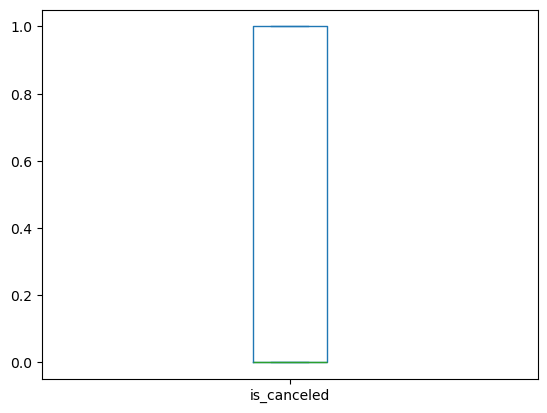

In [280]:
#is_canceled column:

fulldata.plot(y=['is_canceled'], kind='box')

## Boxplotting and removing Outlier:

### lead_time:

<Axes: >

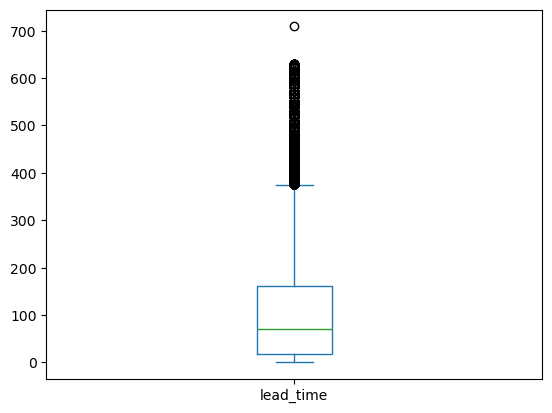

In [281]:
fulldata.plot(y=['lead_time'], kind='box')

<Axes: >

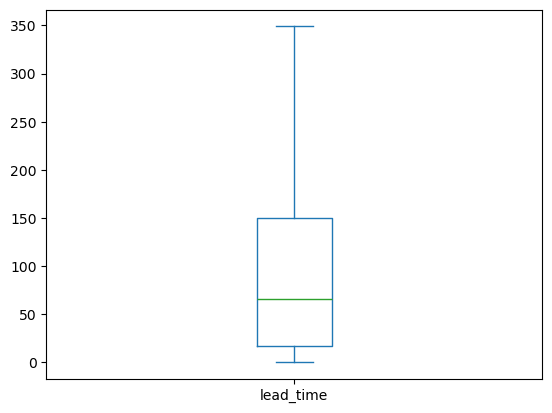

In [282]:
fulldata = fulldata.drop(fulldata[fulldata['lead_time']> 349].index)
fulldata.plot(y=['lead_time'], kind='box')

### stays_in_weekend_nights:

<Axes: >

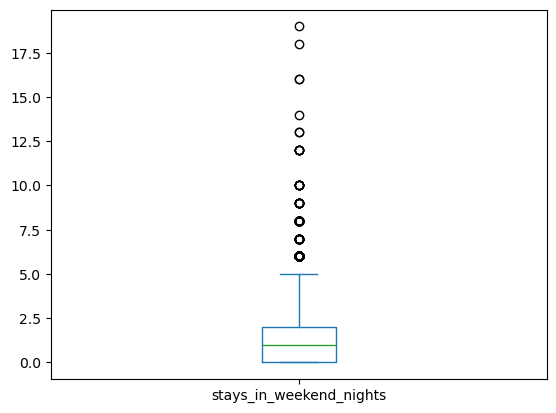

In [283]:
fulldata.plot(y=['stays_in_weekend_nights'], kind='box')

<Axes: >

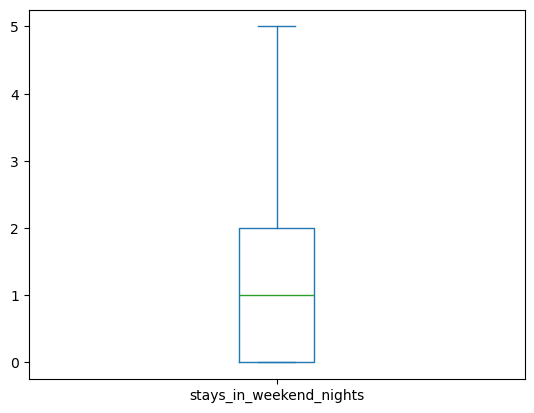

In [302]:
fulldata = fulldata.drop(fulldata[fulldata['stays_in_weekend_nights']> 5].index)
fulldata.plot(y=['stays_in_weekend_nights'], kind='box')

<Axes: >

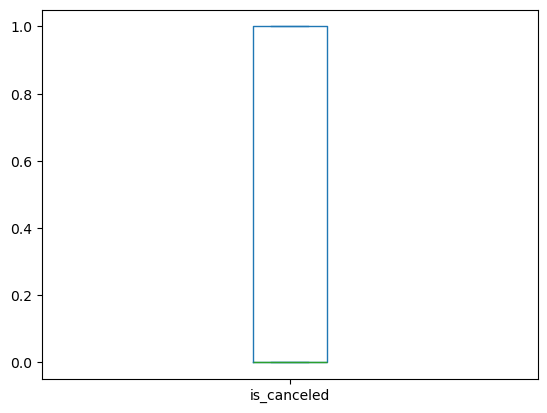

In [284]:
fulldata.plot(y=['is_canceled'], kind='box')

<Axes: >

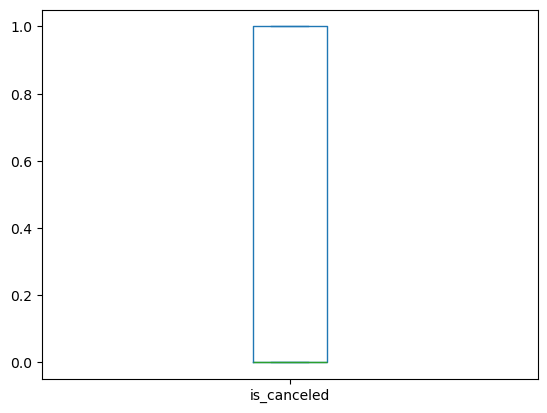

In [285]:
fulldata.plot(y=['is_canceled'], kind='box')

<Axes: >

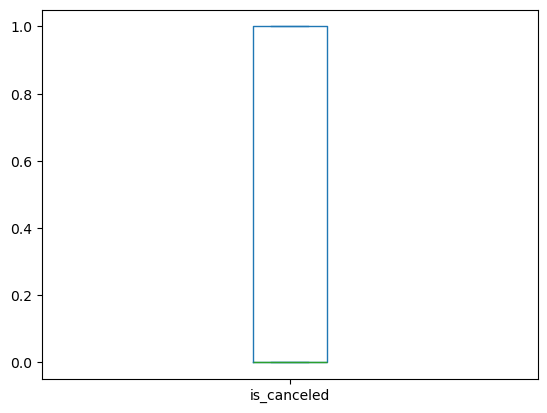

In [286]:
fulldata.plot(y=['is_canceled'], kind='box')

<Axes: >

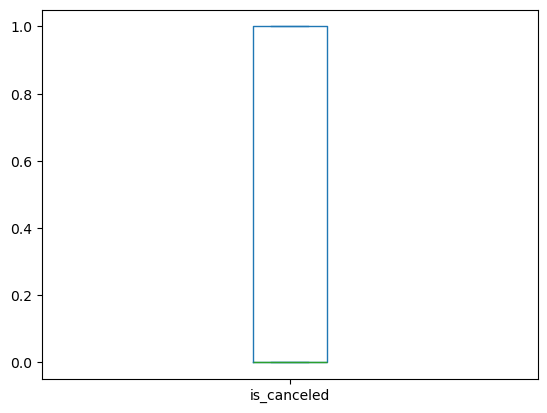

In [287]:
fulldata.plot(y=['is_canceled'], kind='box')

<Axes: >

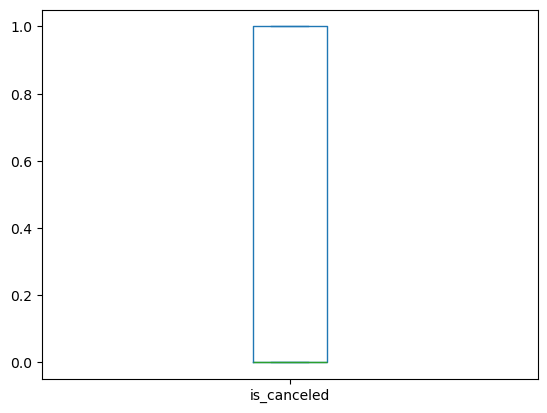

In [288]:
fulldata.plot(y=['is_canceled'], kind='box')

## 1.3 Column data type conversion (5%)

All necessary columns should be correctly converted to appropriate data types.


# 2. Exploratory Data Analysis (25%)


---





You've also been provided with examples of valuable insights that could be of interest to hotel management, including:

* Calculating cancellation percentages for City and Resort hotels.
* Identifying the most frequently ordered meal types.
* Determining the number of returning guests.
* Discovering the most booked room types.
* Exploring correlations between room types and cancellations.


Visualize these insights using three different types of visualizations covered in the practicals, such as:

* Bar graphs
* Pie charts
* Line charts
* Heatmaps

## 2.1. Calculating cancellation percentages for City and Resort hotels.

In [289]:
# <<< Your code here >>>

## 2.2. Identifying the most frequently ordered meal types.

In [290]:
# <<< Your code here >>>

## 2.3. Determining the number of returning guests.

In [291]:
# <<< Your code here >>>

## 2.4. Discovering the most booked room types.

In [292]:
# <<< Your code here >>>

## 2.5. Exploring correlations between room types and cancellations.

In [293]:
# <<< Your code here >>>

# 3. Feature Engineering (20%)


---





Apply various feature engineering techniques, covered in the lectures and practicals.

Hint:
* Binning
* Encoding
* Scaling
* Feature selection

## 3.1. Binning

In [294]:
# <<< Your code here >>>

## 3.2. Encoding

In [295]:
# <<< Your code here >>>

## 3.3. Scaling

In [296]:
# <<< Your code here >>>

## 3.4. Feature selection

In [297]:
# <<< Your code here >>>

# 4. Classifier Training (20%)


---


Utilise the sklearn Python library to train a ML model (e.g.decision tree classifier). Your process should start with splitting your dataset into input features (X) and a target feature (y). Next, divide the data into 70% training and 30% testing subsets. Train your model on the training dataset and evaluate using test dataset with appropriate metrics. Aim to achieve higher accuracy e.g. more than 70% accuracy using your model.

## 4.1. Data Splitting (5%)

In [298]:
# <<< Your code here >>>

## 4.2. Model Training (10%)

In [299]:
# <<< Your code here >>>

## 4.3. Model Evaluation (5%)

In [300]:
# <<< Your code here >>>

# 5. Feature Importance (10%)


---

Assess the importance of features within your decision tree model. Provide commentary on the reliability of your model's results based on the feature importance scores.

In [301]:
# <<< Your code here >>>